In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
data_cleaned = data.drop(columns=["id", "Unnamed: 32"])
label_encoder = LabelEncoder()
data_cleaned["diagnosis"] = label_encoder.fit_transform(data_cleaned["diagnosis"])

X = data_cleaned.drop(columns=["diagnosis"])
y = data_cleaned["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
}

metrics = {"Model": [], "Accuracy": [], "Precision": [], "Recall": []}

for model_name, model in models.items():
    if model_name in [
        "Logistic Regression",
        "K-Nearest Neighbors",
        "Support Vector Machine",
    ]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy_score(y_test, y_pred))
    metrics["Precision"].append(precision_score(y_test, y_pred))
    metrics["Recall"].append(recall_score(y_test, y_pred))

                    Model  Accuracy  Precision    Recall
0     Logistic Regression  0.964912   0.975000  0.928571
1           Decision Tree  0.938596   0.906977  0.928571
2           Random Forest  0.973684   1.000000  0.928571
3     K-Nearest Neighbors  0.956140   0.974359  0.904762
4  Support Vector Machine  0.973684   1.000000  0.928571


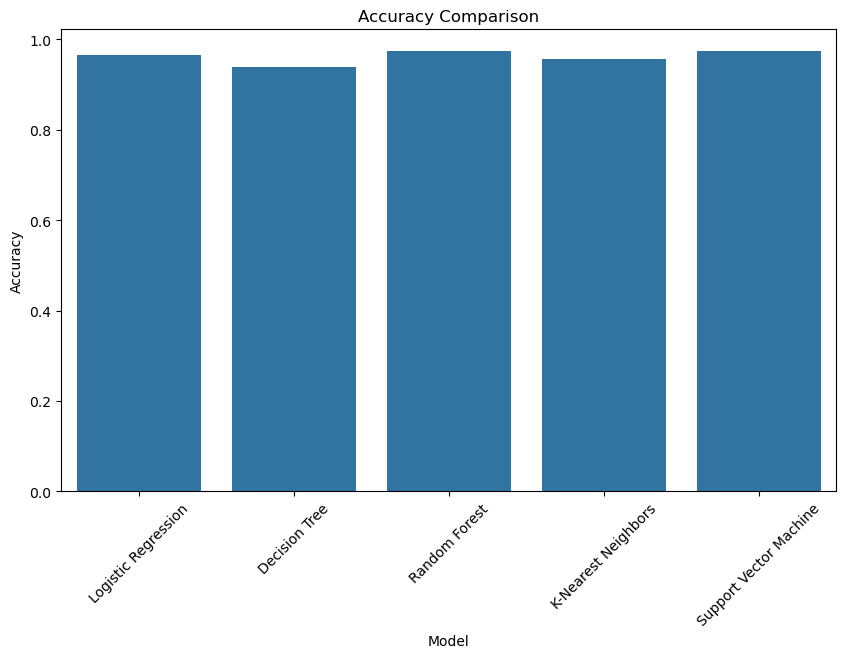

In [5]:
metrics_df = pd.DataFrame(metrics)
print(metrics_df)

plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Accuracy", data=metrics_df)
plt.title("Accuracy Comparison")
plt.xticks(rotation=45)
plt.show()

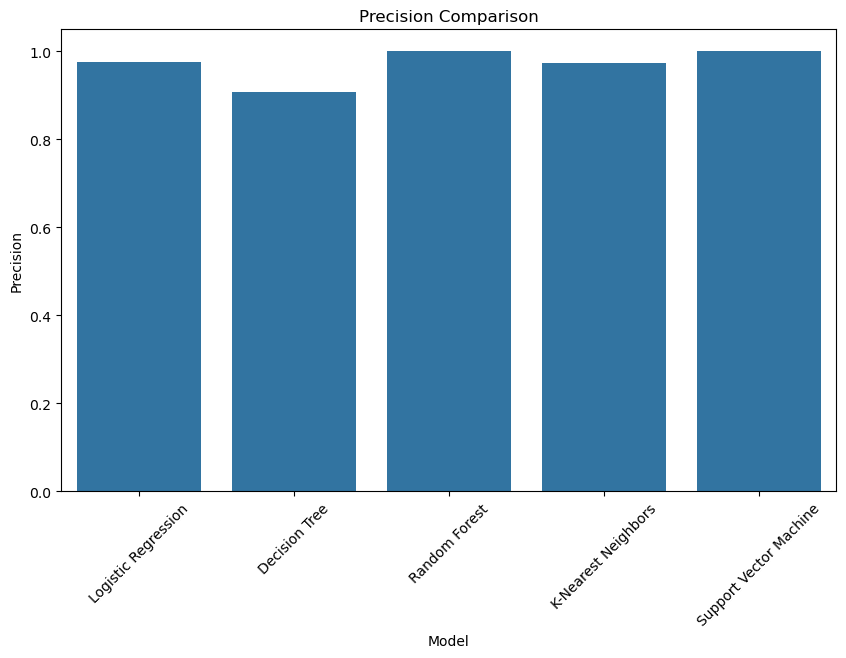

In [6]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Precision", data=metrics_df)
plt.title("Precision Comparison")
plt.xticks(rotation=45)
plt.show()

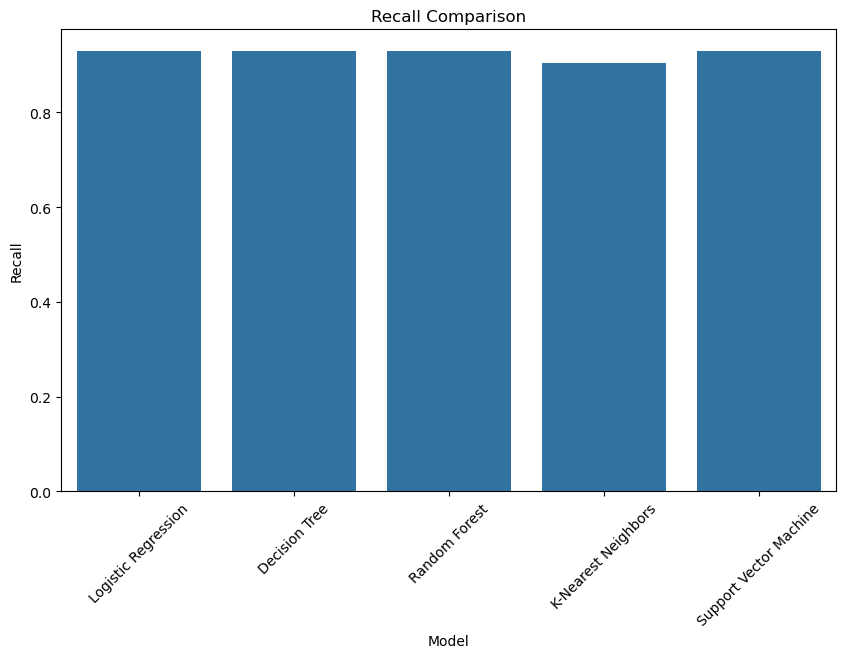

In [7]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Recall", data=metrics_df)
plt.title("Recall Comparison")
plt.xticks(rotation=45)
plt.show()

In [8]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [50, 100, 150],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
}

grid_search = GridSearchCV(
    RandomForestClassifier(), param_grid, cv=5, scoring="accuracy"
)
grid_search.fit(X_train, y_train)

print("Best parameters for Random Forest:", grid_search.best_params_)
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
precision_best_rf = precision_score(y_test, y_pred_best_rf)
recall_best_rf = recall_score(y_test, y_pred_best_rf)

print(
    f"Best Random Forest - Accuracy: {accuracy_best_rf}, Precision: {precision_best_rf}, Recall: {recall_best_rf}"
)

Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Best Random Forest - Accuracy: 0.9649122807017544, Precision: 1.0, Recall: 0.9047619047619048
